# Mental Attention States Classification Using EEG Data

## I. Loading Dataset

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def loading_data(file_path):
    """Read file .mat"""
    
    data = loadmat(file_path)
    result = data['o']['data'][0, 0]

    return result

In [3]:
eeg_data_dict = {}

for i in range(1, 35):
    eeg_data_dict[f"eeg_data_{i}"] = []  

In [4]:
count = 1
while count <= 34:
    file_path = f"EEG Data/eeg_record{count}.mat"
    try:
        arr = loading_data(file_path)
        features = arr[:, 4:18]
        eeg_data_dict[f"eeg_data_{count}"].append(features)
    except Exception as e:
        print(f'Error loading file {file_path}: {e}')
    count += 1


In [5]:
def show_rows_columns(arr):
    """Hiển thị số dòng và số cột của một numpy array."""
    
    row = len(arr)
    col = len(arr[0])
    print(f"Rows: {row}; Columns: {col}\n")

for count in range(1, 35):
    print(f"EEG Data {count}:")
    show_rows_columns(eeg_data_dict[f'eeg_data_{count}'][0]) 


EEG Data 1:
Rows: 308868; Columns: 14

EEG Data 2:
Rows: 366020; Columns: 14

EEG Data 3:
Rows: 357224; Columns: 14

EEG Data 4:
Rows: 380344; Columns: 14

EEG Data 5:
Rows: 351204; Columns: 14

EEG Data 6:
Rows: 288752; Columns: 14

EEG Data 7:
Rows: 398816; Columns: 14

EEG Data 8:
Rows: 365888; Columns: 14

EEG Data 9:
Rows: 388788; Columns: 14

EEG Data 10:
Rows: 381340; Columns: 14

EEG Data 11:
Rows: 391624; Columns: 14

EEG Data 12:
Rows: 356728; Columns: 14

EEG Data 13:
Rows: 373304; Columns: 14

EEG Data 14:
Rows: 345164; Columns: 14

EEG Data 15:
Rows: 359164; Columns: 14

EEG Data 16:
Rows: 234372; Columns: 14

EEG Data 17:
Rows: 443972; Columns: 14

EEG Data 18:
Rows: 361840; Columns: 14

EEG Data 19:
Rows: 333236; Columns: 14

EEG Data 20:
Rows: 396812; Columns: 14

EEG Data 21:
Rows: 336280; Columns: 14

EEG Data 22:
Rows: 324764; Columns: 14

EEG Data 23:
Rows: 388088; Columns: 14

EEG Data 24:
Rows: 360928; Columns: 14

EEG Data 25:
Rows: 415164; Columns: 14

EEG Data 

## II. Split dataset, label by paper

In [6]:
def split_eeg_data(eeg_data, sample_rate=128, milestone_focused=15, milestone_unfocused=30):
    """
    Hàm tách dữ liệu EEG thành ba phần: Focused, Unfocused, Drowsy.
    
    Parameters:
    - eeg_data: Dữ liệu EEG dưới dạng numpy array (mảng 2D với dạng (số mẫu, số kênh)).
    - sample_rate: Tần số lấy mẫu (Hz), mặc định là 128 Hz.
    - duration_focused: Thời gian cho phần "Focused" (phút), mặc định là 15 phút.
    - duration_unfocused: Thời gian cho phần "Unfocused" (phút), mặc định là 15 phút.
    
    Returns:
    - focused_data: 15 phút đầu tiên, 
    - unfocused_data: 15 phút tiếp theo, 
    - drowsy_data: Phần còn lại.
    """
    focused_samples = milestone_focused * 60 * sample_rate  
    unfocused_samples = milestone_unfocused * 60 * sample_rate 
    total_samples = eeg_data.shape[0]
    
    if total_samples < focused_samples:
        focused_data = eeg_data[:]

    elif total_samples < unfocused_samples:
        focused_data = eeg_data[:(focused_samples - 1)]
        unfocused_data = eeg_data[focused_samples:]
        drowsy_data = np.array([])   

    else:
        focused_data = eeg_data[:focused_samples - 1]
        unfocused_data = eeg_data[focused_samples:unfocused_samples - 1]
        drowsy_data = eeg_data[unfocused_samples:]  
    
    return focused_data, unfocused_data, drowsy_data


In [7]:
for count in range(1, 35):
    eeg_data = eeg_data_dict[f'eeg_data_{count}'][0] 
    
    focused, unfocused, drowsy = [], [], []
    focused, unfocused, drowsy = split_eeg_data(eeg_data)
    
    print(f"EEG Data {count}:")
    print(f"Focused: {focused.shape[0]} samples")
    print(f"Unfocused: {unfocused.shape[0]} samples")
    print(f"Drowsy: {drowsy.shape[0]} samples")
    print()

    

EEG Data 1:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 78468 samples

EEG Data 2:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 135620 samples

EEG Data 3:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 126824 samples

EEG Data 4:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 149944 samples

EEG Data 5:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 120804 samples

EEG Data 6:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 58352 samples

EEG Data 7:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 168416 samples

EEG Data 8:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 135488 samples

EEG Data 9:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 158388 samples

EEG Data 10:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 150940 samples

EEG Data 11:
Focused: 115199 samples
Unfocused: 115199 samples
Drowsy: 161224 samples

EEG Data 12:
Focused: 115199 samples
Unfocused: 115199

In [8]:
flag = []

for i in range(0, 1977):
    flag.append(i * 128)

In [9]:
def split_eeg_data_by_time(eeg_data, flag, sample_rate=128):
    """
    Chia dữ liệu EEG thành các phần theo mốc từ `flag`.
    
    Parameters:
    - eeg_data: Dữ liệu EEG dưới dạng numpy array (mảng 2D với dạng (số mẫu, số kênh)).
    - flag: Mảng chứa các chỉ số thời gian (sample indices) theo mốc.
    - sample_rate: Tần số lấy mẫu (Hz), mặc định là 128 Hz.
    
    Returns:
    - segments: Danh sách các phần được chia từ dữ liệu EEG.
    """
    segments = []

    total_samples = eeg_data.shape[0]  
    
    i = 0
    while i < len(flag) - 3:
        start_sample = flag[i]
        end_sample = flag[i + 3]
        
        if end_sample -1 <= total_samples:
            segments.append(eeg_data[start_sample:end_sample - 1])
        else:
            break

        i += 2

    return segments


### 1. Test Set

In [47]:
focused_test, unfocused_test, drowsy_test = [], [], []

for count in range(1, 11):
    eeg_data = eeg_data_dict[f'eeg_data_{count}'][0] 
    
    focused, unfocused, drowsy = [], [], []
    focused, unfocused, drowsy = split_eeg_data(eeg_data)

    temp_focused = split_eeg_data_by_time(focused, flag)
    temp_unfocused = split_eeg_data_by_time(unfocused, flag)
    temp_drowsy = split_eeg_data_by_time(drowsy, flag)

    for i in range(len(temp_focused)):
        focused_test.append(temp_focused[i])

    for i in range(len(temp_unfocused)):
        unfocused_test.append(temp_unfocused[i])

    for i in range(len(temp_drowsy)):
        drowsy_test.append(temp_drowsy[i])
    

In [48]:
focused_test = np.stack(focused_test, axis=0)
print("Kích thước focused_test", focused_test.shape)


Kích thước focused_test (4490, 383, 14)


In [49]:
unfocused_test = np.stack(unfocused_test, axis=0)
print("Kích thước unfocused_test:", unfocused_test.shape)


Kích thước unfocused_test: (4490, 383, 14)


In [50]:
drowsy_test = np.stack(drowsy_test, axis=0)
print("Kích thước drowsy_test:", drowsy_test.shape)


Kích thước drowsy_test: (5004, 383, 14)


In [51]:
focused_labels = np.zeros(focused_test.shape[0], dtype=int)
unfocused_labels = np.ones(unfocused_test.shape[0], dtype=int)
drowsy_labels = np.full(drowsy_test.shape[0], 2, dtype=int)

print(f"focused_labels: {len(focused_labels)}; unfocused_labels: {len(unfocused_labels)}; drowsy_labels: {len(drowsy_labels)}")

focused_labels: 4490; unfocused_labels: 4490; drowsy_labels: 5004


In [52]:
n_samples = 4490
indices_drowsy = np.random.choice(drowsy_test.shape[0], n_samples, replace=False)

drowsy_test = drowsy_test[indices_drowsy]
drowsy_labels = drowsy_labels[indices_drowsy]

print("Kích thước drowsy_test:", drowsy_test.shape)
print(f"Kích thước drowsy_labels: {len(drowsy_labels)}")

Kích thước drowsy_test: (4490, 383, 14)
Kích thước drowsy_labels: 4490


In [53]:
x_test = np.concatenate([focused_test, unfocused_test, drowsy_test], axis=0)
y_test = np.concatenate([focused_labels, unfocused_labels, drowsy_labels], axis=0)

print(f"x_test: {len(x_test)}; y_test: {len(y_test)}")

x_test: 13470; y_test: 13470


### 2. Training Set

In [54]:
focused_train, unfocused_train, drowsy_train = [], [], []

for count in range(11, 31):
    eeg_data = eeg_data_dict[f'eeg_data_{count}'][0] 
    
    focused, unfocused, drowsy = [], [], []
    focused, unfocused, drowsy = split_eeg_data(eeg_data)

    temp_focused = split_eeg_data_by_time(focused, flag)
    temp_unfocused = split_eeg_data_by_time(unfocused, flag)
    
    temp_drowsy = split_eeg_data_by_time(drowsy, flag)

    for i in range(len(temp_focused)):
        focused_train.append(temp_focused[i])

    for i in range(len(temp_unfocused)):
        unfocused_train.append(temp_unfocused[i])

    for i in range(len(temp_drowsy)):
        drowsy_train.append(temp_drowsy[i])
    

In [55]:
focused_train = np.stack(focused_train, axis=0)
print("Kích thước focused_train:", focused_train.shape)


Kích thước focused_train: (8980, 383, 14)


In [56]:
unfocused_train = np.stack(unfocused_train, axis=0)
print("Kích thước unfocused_train:", unfocused_train.shape)


Kích thước unfocused_train: (8918, 383, 14)


In [57]:
drowsy_train = np.stack(drowsy_train, axis=0)
print("Kích thước drowsy_train:", drowsy_train.shape)


Kích thước drowsy_train: (9858, 383, 14)


In [58]:
focused_labels = np.zeros(focused_train.shape[0], dtype=int)
unfocused_labels = np.ones(unfocused_train.shape[0], dtype=int)
drowsy_labels = np.full(drowsy_train.shape[0], 2, dtype=int)

print(f"focused_labels: {len(focused_labels)}; unfocused_labels: {len(unfocused_labels)}; drowsy_labels: {len(drowsy_labels)}")

focused_labels: 8980; unfocused_labels: 8918; drowsy_labels: 9858


In [59]:
n_samples = 8980
indices_drowsy = np.random.choice(drowsy_train.shape[0], n_samples, replace=False)

drowsy_train = drowsy_train[indices_drowsy]
drowsy_labels = drowsy_labels[indices_drowsy]

print("Kích thước drowsy_train:", drowsy_train.shape)
print(f"Kích thước drowsy_labels: {len(drowsy_labels)}")

Kích thước drowsy_train: (8980, 383, 14)
Kích thước drowsy_labels: 8980


In [60]:
x_train = np.concatenate([focused_train, unfocused_train, drowsy_train], axis=0)
y_train = np.concatenate([focused_labels, unfocused_labels, drowsy_labels], axis=0)

print(f"x_train: {len(x_train)}; y_train: {len(y_train)}")

x_train: 26878; y_train: 26878


### 3. Validation Set

In [61]:
focused_validation, unfocused_validation, drowsy_validation = [], [], []

for count in range(31, 35):
    eeg_data = eeg_data_dict[f'eeg_data_{count}'][0] 
    
    focused, unfocused, drowsy = [], [], []
    focused, unfocused, drowsy = split_eeg_data(eeg_data)

    temp_focused = split_eeg_data_by_time(focused, flag)
    temp_unfocused = split_eeg_data_by_time(unfocused, flag)
    temp_drowsy = split_eeg_data_by_time(drowsy, flag)

    for i in range(len(temp_focused)):
        focused_validation.append(temp_focused[i])

    for i in range(len(temp_unfocused)):
        unfocused_validation.append(temp_unfocused[i])

    for i in range(len(temp_drowsy)):
        drowsy_validation.append(temp_drowsy[i])
    

In [62]:
focused_validation = np.stack(focused_validation, axis=0)
print("Kích thước focused_validation:", focused_validation.shape)


Kích thước focused_validation: (1796, 383, 14)


In [63]:
unfocused_validation = np.stack(unfocused_validation, axis=0)
print("Kích thước unfocused_validation:", unfocused_validation.shape)


Kích thước unfocused_validation: (1796, 383, 14)


In [64]:
drowsy_validation = np.stack(drowsy_validation, axis=0)
print("Kích thước drowsy_validation:", drowsy_validation.shape)


Kích thước drowsy_validation: (3445, 383, 14)


In [65]:
focused_labels = np.zeros(focused_validation.shape[0], dtype=int)
unfocused_labels = np.ones(unfocused_validation.shape[0], dtype=int)
drowsy_labels = np.full(drowsy_validation.shape[0], 2, dtype=int)

print(f"focused_labels: {len(focused_labels)}; unfocused_labels: {len(unfocused_labels)}; drowsy_labels: {len(drowsy_labels)}")

focused_labels: 1796; unfocused_labels: 1796; drowsy_labels: 3445


In [66]:
n_samples = 1796
indices_drowsy = np.random.choice(drowsy_validation.shape[0], n_samples, replace=False)

drowsy_validation = drowsy_validation[indices_drowsy]
drowsy_labels = drowsy_labels[indices_drowsy]

print("Kích thước drowsy_validation:", drowsy_validation.shape)
print(f"Kích thước drowsy_labels: {len(drowsy_labels)}")

Kích thước drowsy_validation: (1796, 383, 14)
Kích thước drowsy_labels: 1796


In [67]:
x_validation = np.concatenate([focused_validation, unfocused_validation, drowsy_validation], axis=0)
y_validation = np.concatenate([focused_labels, unfocused_labels, drowsy_labels], axis=0)

print(f"x_validation: {len(x_validation)}; y_validation: {len(y_validation)}")

x_validation: 5388; y_validation: 5388


## II. Data Preprocessing

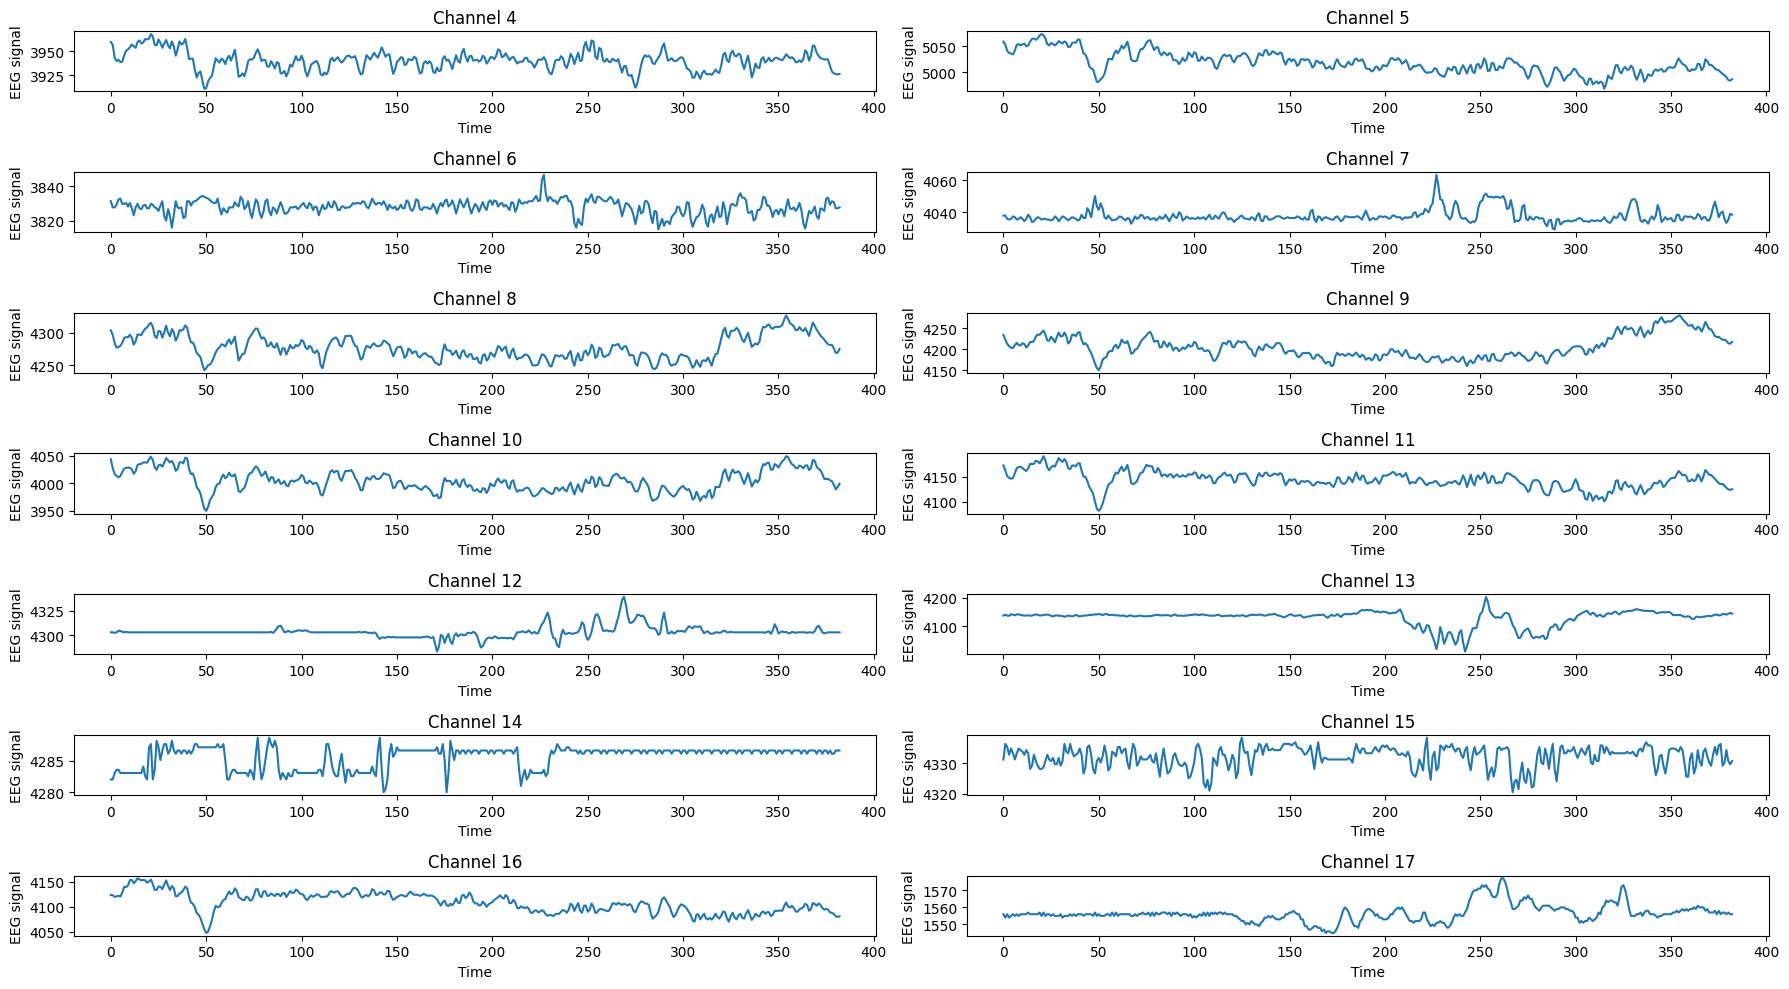

In [68]:
sample = x_train[0, :, :] 

plt.figure(figsize=(18, 10))

num_channels = sample.shape[1]  
time_steps = np.arange(sample.shape[0]) 

for i in range(num_channels):
    plt.subplot(7, 2, i+1)  
    plt.plot(time_steps, sample[:, i])
    plt.title(f'Channel {i+4}')  
    plt.xlabel('Time')
    plt.ylabel('EEG signal')
    
plt.tight_layout()  
plt.show()


In [69]:
import scipy.signal as signal
from sklearn.preprocessing import MinMaxScaler


In [70]:
def bandpass_filter(data, lowcut=1.0, highcut=50.0, fs=250.0, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)


In [71]:
x_train = np.apply_along_axis(bandpass_filter, axis=0, arr=x_train)


In [72]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
x_validation = scaler.transform(x_validation.reshape(-1, x_validation.shape[-1])).reshape(x_validation.shape)


In [74]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_validation.shape, y_validation.shape)


(26878, 383, 14) (26878,)
(13470, 383, 14) (13470,)
(5388, 383, 14) (5388,)


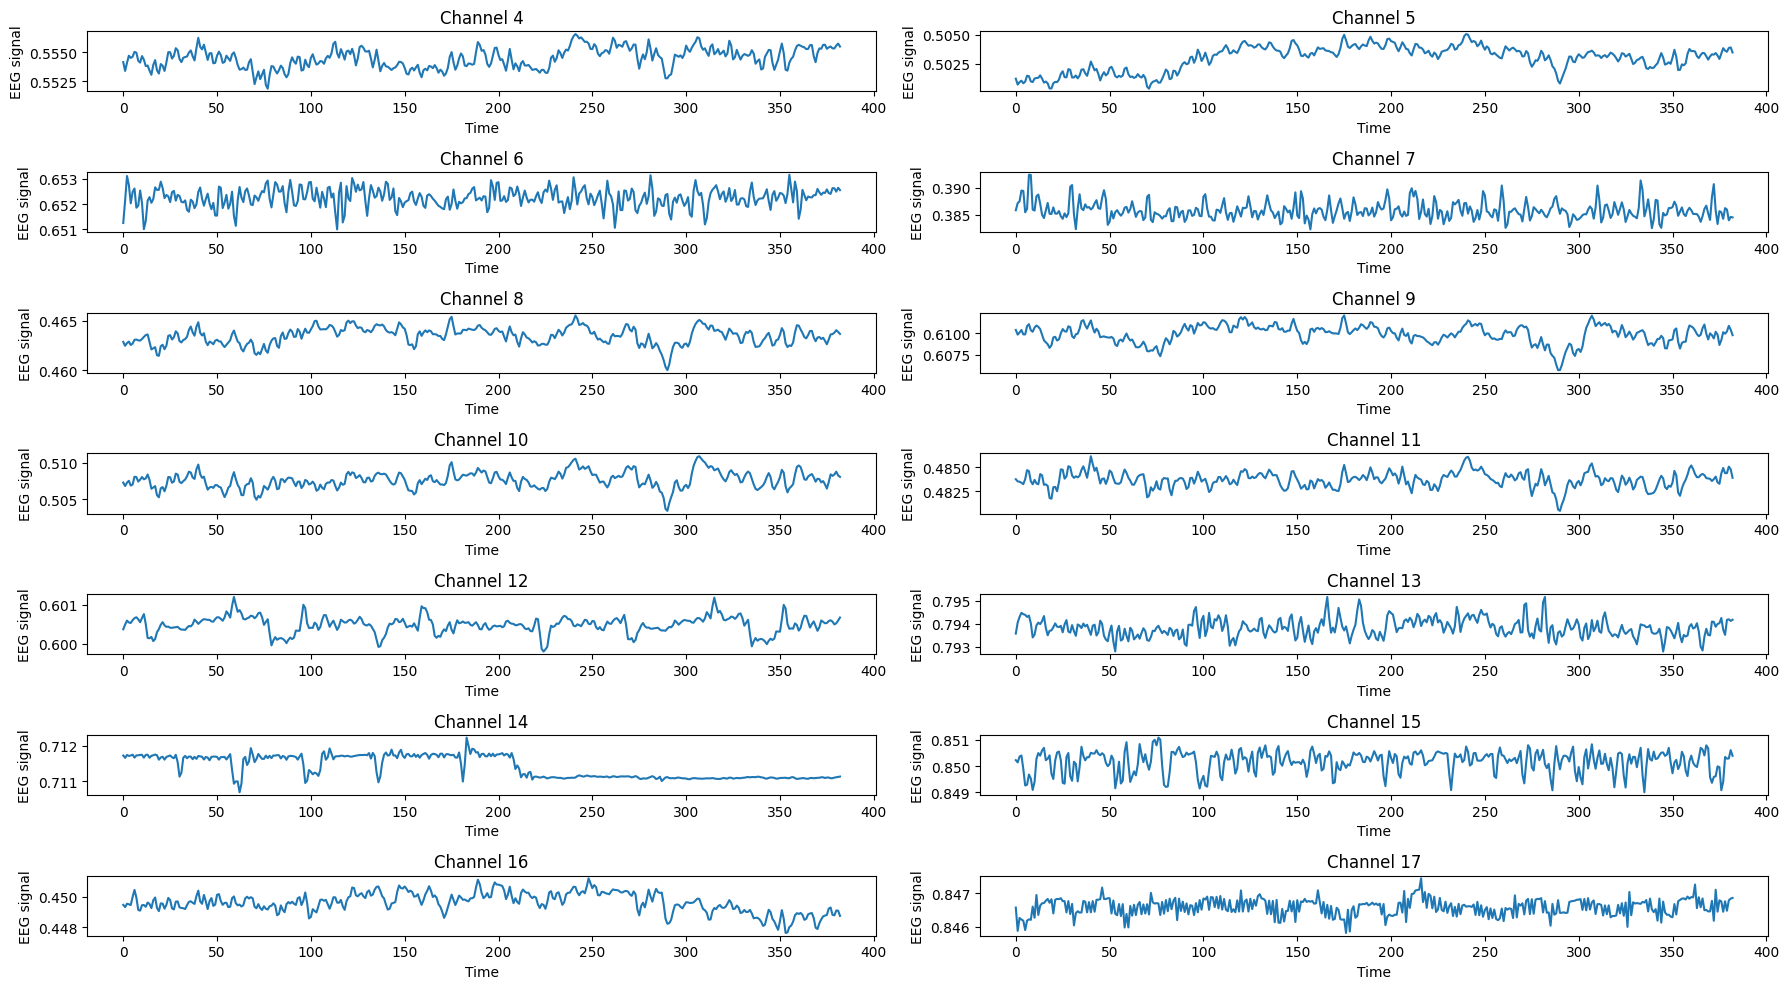

In [75]:
sample = x_train[0, :, :] 

plt.figure(figsize=(18, 10))

num_channels = sample.shape[1]  
time_steps = np.arange(sample.shape[0]) 

for i in range(num_channels):
    plt.subplot(7, 2, i+1)  
    plt.plot(time_steps, sample[:, i])
    plt.title(f'Channel {i+4}')  
    plt.xlabel('Time')
    plt.ylabel('EEG signal')
    
plt.tight_layout()  
plt.show()


## III. Feature Engineering

## IV. Model Development

## V. Analysis and Visualization